<a href="https://colab.research.google.com/github/Rohan20202/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Importing Libraries**

In [143]:
#Importing the libraries
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from datetime import date,datetime  #Used for analysing the date variable

**Connecting the drive**

In [144]:
#importing and connecting to the drive storage
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Loading**

In [145]:
#loading the dataset
netflix= pd.read_csv('/content/drive/MyDrive/Netflix movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [146]:
# first 5 values
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [147]:
#shape and size of dataset
netflix.shape

(7787, 12)

In [148]:
#columns in the dataset
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [149]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Data Cleaning**

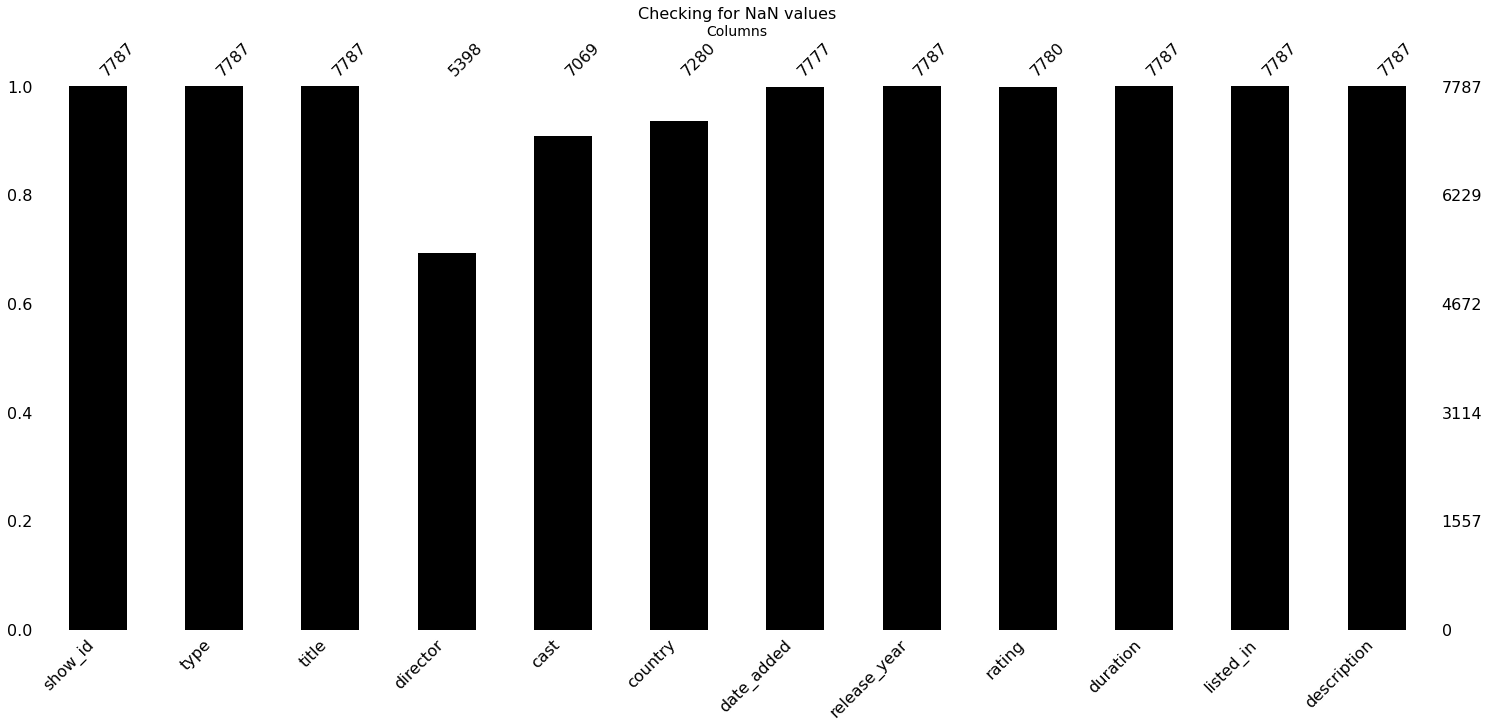

In [150]:
#checking for null values
mno.bar(netflix, color='Black')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [151]:
#dropping the null values
netflix.dropna(inplace=True)

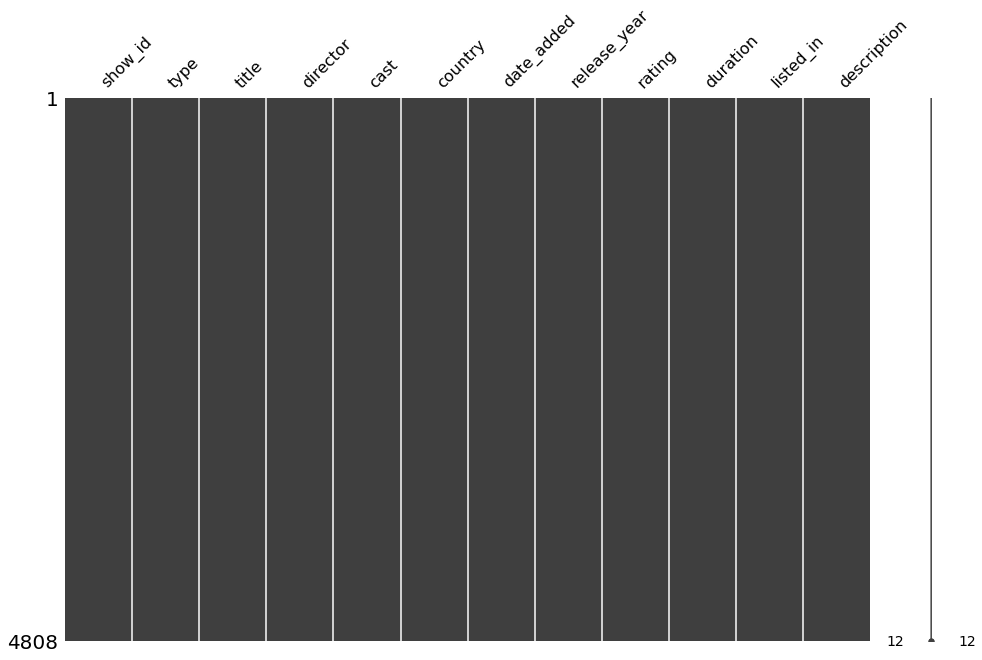

In [152]:
#checking for nan values
mno.matrix(netflix,figsize=(16,10))

## **Feature engineering**

**Convert Date Time format**

In [153]:
netflix['date'] = pd.to_datetime(netflix['date_added'])
netflix['Year'] = netflix['date'].dt.year
netflix['Month'] = netflix['date'].dt.month
netflix['Day'] = netflix['date'].dt.day
netflix['Year'].astype(int);
netflix['Day'].astype(int);

In [154]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,Year,Month,Day
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,1,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,7,1


# **1. Data Visualization**

**Number of Movies/Tv shows released (Year wise)**

In [155]:
Year_df=netflix['Year'].value_counts().reset_index()
Year_df.rename(columns={'index': 'Released_year'}, inplace=True)
Year_df.rename(columns={'Year': 'Count'}, inplace=True)
Year_df

,Released_year,Count
0,2019,1337
1,2020,1229
2,2018,1114
3,2017,752
4,2016,207
5,2021,78
6,2015,50
7,2014,14
8,2011,13
9,2013,7


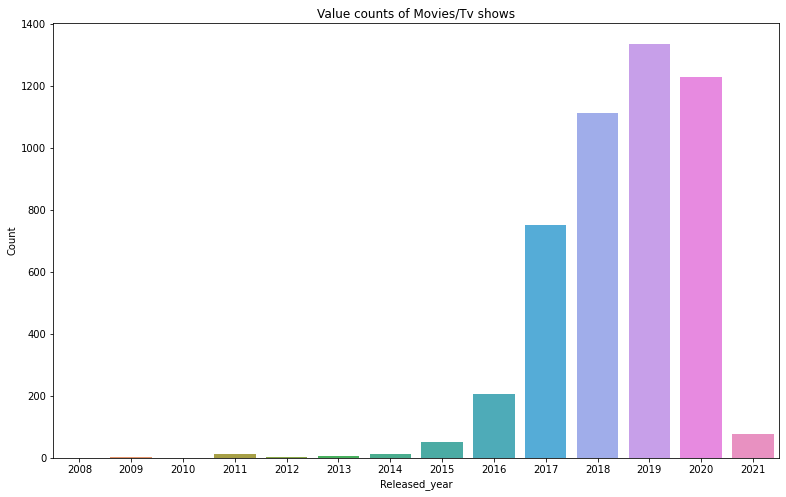

In [156]:
plt.figure(figsize=(13,8))
plt.title('Value counts of Movies/Tv shows')
sns.barplot(x='Released_year',y='Count',data=Year_df)

**Number of Movies/Tv shows released (Month wise)**

In [157]:
month_df=netflix['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Released_Month'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Released_Month,Count
0,10,498
1,1,497
2,12,495
3,11,470
4,3,425
5,7,371
6,4,370
7,8,369
8,9,355
9,6,334


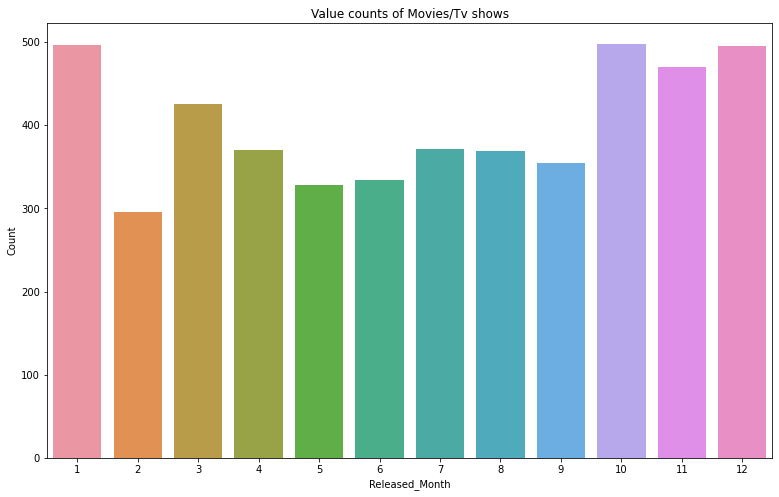

In [158]:
plt.figure(figsize=(13,8))
plt.title('Value counts of Movies/Tv shows')
sns.barplot(x='Released_Month',y='Count',data=month_df)

**Number of Movies/Tv shows released (Date wise)**

In [159]:
Day_df=netflix['Day'].value_counts().reset_index()
Day_df.rename(columns={'index': 'Released_date'}, inplace=True)
Day_df.rename(columns={'Day': 'Count'}, inplace=True)
Day_df

,Released_date,Count
0,1,1396
1,15,391
2,31,168
3,16,155
4,2,148
5,10,134
6,5,134
7,20,132
8,19,131
9,6,113


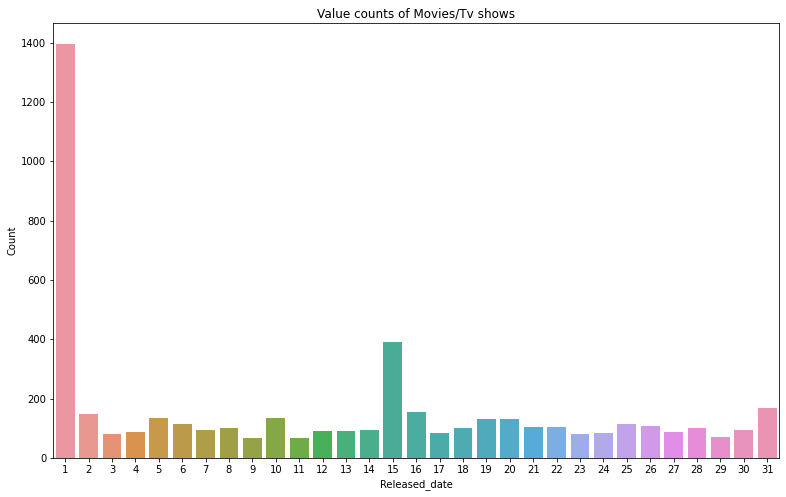

In [160]:
plt.figure(figsize=(13,8))
plt.title('Value counts of Movies/Tv shows')
sns.barplot(x='Released_date',y='Count',data=Day_df)

**Type: Movie and TV Shows**

In [161]:
# Value counts of Rendted bikes on holidays
Type= netflix['type'].value_counts()
Type

Movie      4673
TV Show     135
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x7fbd420765d0>,
 [Text(-0.6317842255148798, -0.9004713723326042, 'Movie'),
  Text(0.6892191436105667, 0.9823324142471922, 'TV Show')],
 [Text(-0.34460957755357075, -0.49116620309051134, '97.2%'),
  Text(0.40204450043949724, 0.5730272416441954, '2.8%')])

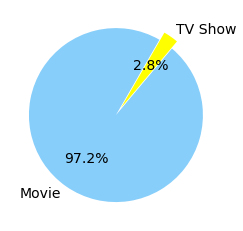

In [162]:
plt.rcParams['figure.figsize'] = 4,4
labels = netflix['type'].value_counts().index.tolist()
sizes = netflix['type'].value_counts().tolist()
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**Rating of shows and movies**

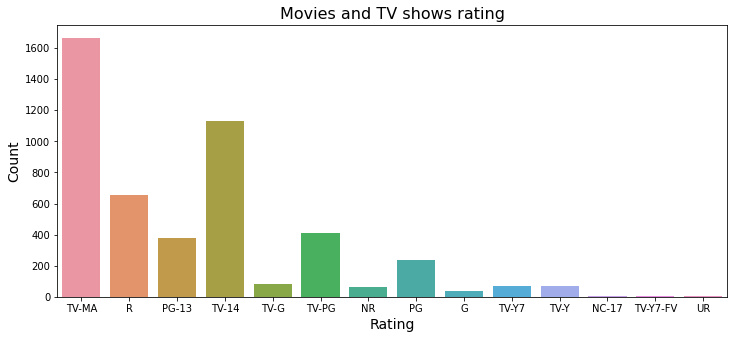

In [163]:
#plotting the value counts of Restaurant ratings
plt.figure(figsize=(12, 5))
sns.countplot(netflix.rating)
plt.title('Movies and TV shows rating', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Top 5 Producer Countries**

In [164]:
country= netflix['country'].value_counts().reset_index()
country.rename(columns={'index' : 'Production_countries'}, inplace= True)
country.rename(columns={'country' : 'count'}, inplace= True)
country.head()

,Production_countries,count
0,United States,1653
1,India,832
2,United Kingdom,174
3,Canada,104
4,Egypt,87


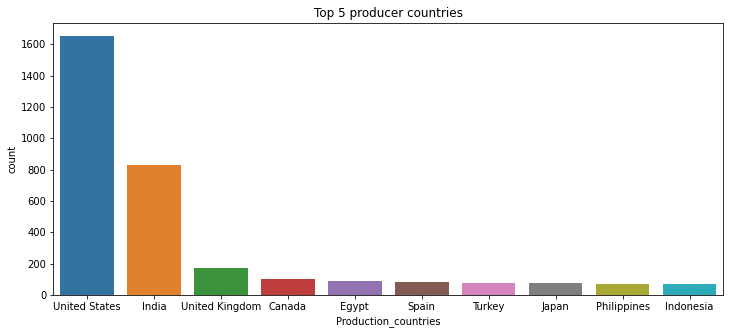

In [165]:
plt.figure(figsize=(12,5))
plt.title('Top 5 producer countries')
sns.barplot(x='Production_countries',y= 'count', data= country[:10])

**value counts movies or tv shows added on netflix**

In [166]:
Date_added= netflix['date_added'].value_counts().reset_index()
Date_added.rename(columns={'index' : 'Date_added'}, inplace= True)
Date_added.rename(columns={'date_added' : 'count'}, inplace= True)
Date_added.head()

,Date_added,count
0,"January 1, 2020",100
1,"November 1, 2019",70
2,"March 1, 2018",67
3,"December 31, 2019",64
4,"October 1, 2018",61


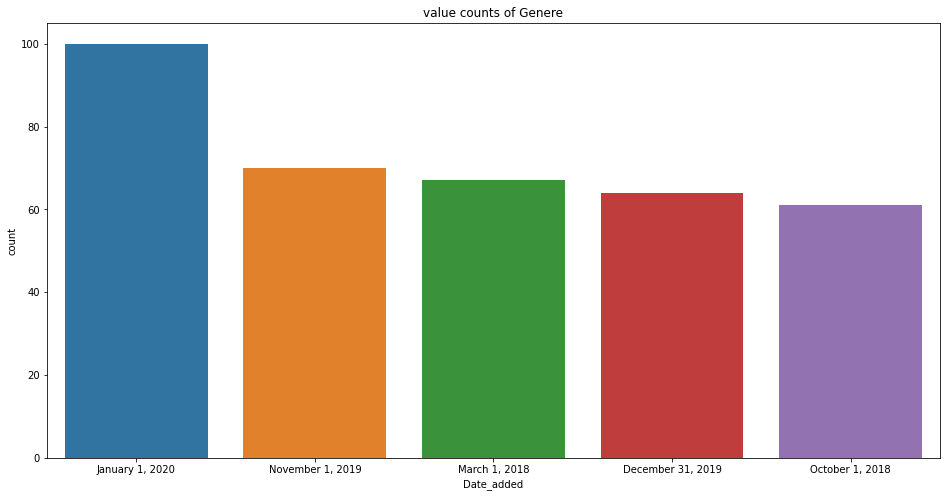

In [167]:
plt.figure(figsize=(16,8))
plt.title('value counts of Genere')
sns.barplot(x='Date_added',y= 'count', data= Date_added[:5])

**value counts of Genere**

In [168]:
Listed_in= netflix['listed_in'].value_counts().reset_index()
Listed_in.rename(columns={'index' : 'Listed_in'}, inplace= True)
Listed_in.rename(columns={'listed_in' : 'count'}, inplace= True)
Listed_in.head()

,Listed_in,count
0,"Dramas, International Movies",306
1,Stand-Up Comedy,276
2,"Comedies, Dramas, International Movies",237
3,"Dramas, Independent Movies, International Movies",213
4,"Children & Family Movies, Comedies",158


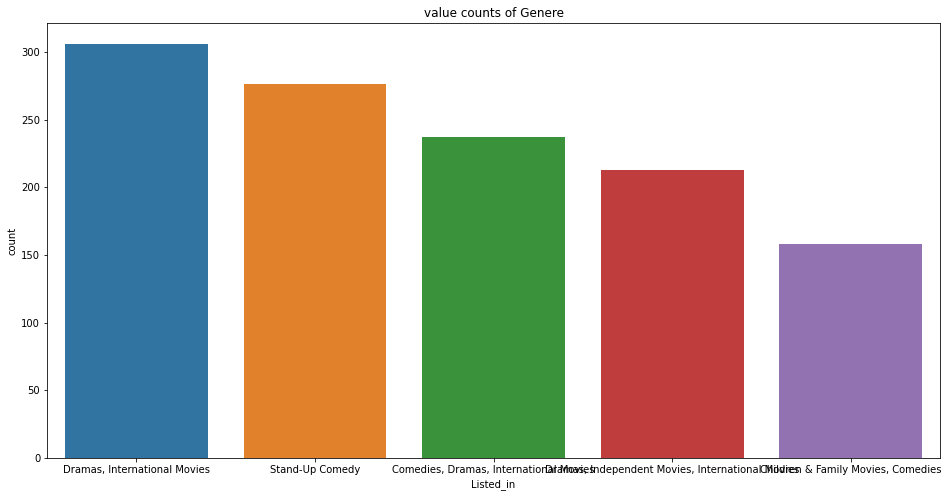

In [169]:
plt.figure(figsize=(16,8))
plt.title('value counts of Genere')
sns.barplot(x='Listed_in',y= 'count', data= Listed_in[:5])

**Value counts of Actors involved in the movie / show**

In [170]:
Cast_name= netflix['cast'].value_counts().reset_index()
Cast_name.rename(columns={'index' : 'Cast_name'}, inplace= True)
Cast_name.rename(columns={'cast' : 'count'}, inplace= True)
Cast_name.head()

,Cast_name,count
0,Samuel West,10
1,Jeff Dunham,7
2,Kevin Hart,6
3,Bill Burr,5
4,Jim Gaffigan,5


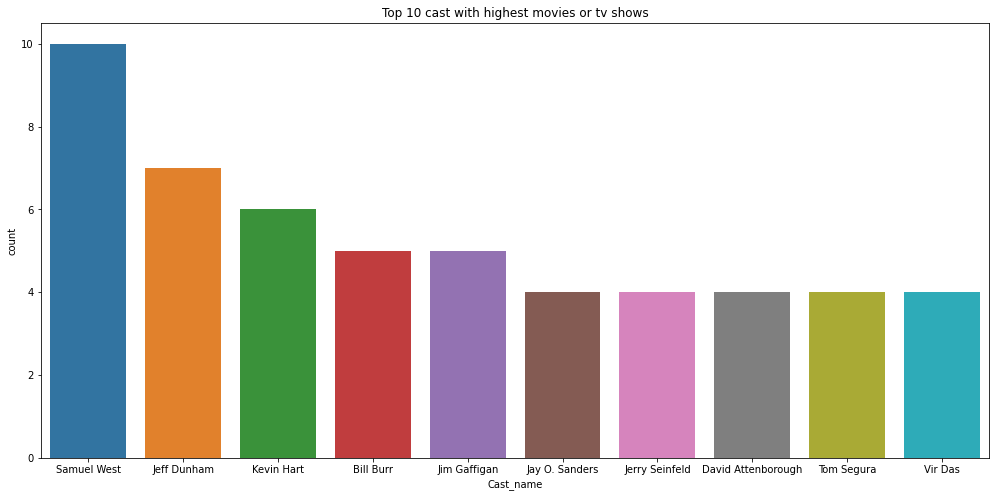

In [171]:
plt.figure(figsize=(17,8))
plt.title('Top 10 cast with highest movies or tv shows')
sns.barplot(x='Cast_name',y= 'count', data=Cast_name[:10])

# **2. Understanding what type content is available in different countries**

In [172]:
m_s_groups = netflix.groupby(["title", "type", "country",]).apply(lambda df: df.date_added) #Returns Pandas Series with movie / series title and original index
m_s_groups.head(40)

title                                  type   country                        
#Alive                                 Movie  South Korea                  27     September 8, 2020
#AnneFrank - Parallel Stories          Movie  Italy                        28          July 1, 2020
#FriendButMarried                      Movie  Indonesia                    31          May 21, 2020
#FriendButMarried 2                    Movie  Indonesia                    32         June 28, 2020
#Roxy                                  Movie  Canada                       34        April 10, 2019
#Selfie                                Movie  Romania                      36          June 1, 2019
#Selfie 69                             Movie  Romania                      37          June 1, 2019
#realityhigh                           Movie  United States                33     September 8, 2017
1 Chance 2 Dance                       Movie  United States                46          July 1, 2017
1 Mile to You         

# **3. Is Netflix has increasingly focusing on TV rather than movies in recent years.**

**Actual Release year of the movie / show**

In [173]:
#Define displayed years:
years= list(range(2008,2021,1))

#separate movies and tv_shows:
movie_rows = netflix.loc[netflix["type"] == "Movie"]
tv_rows = netflix.loc[netflix["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

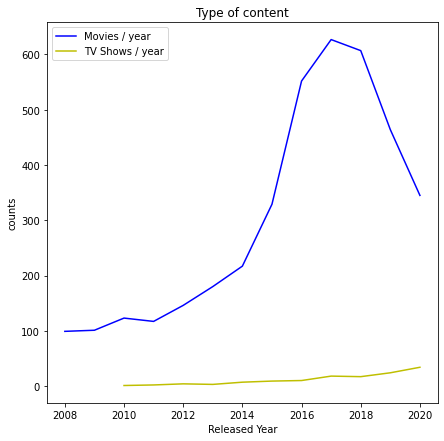

In [174]:
# Set up the matplotlib figure
plt.subplots(figsize=(7,7), sharex=False) 
plt.xlabel("Released Year")
plt.ylabel("counts")
plt.title("Type of content")      
#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", label="Movies / year")
sns.lineplot(data=tv_shows,color="y",  label="TV Shows / year")

**Date it was added on Netflix**

In [175]:
#Define displayed years:
years= list(range(2018,2021,1))

#separate movies and tv_shows:
movie_rows = netflix.loc[netflix["type"] == "Movie"]
tv_rows = netflix.loc[netflix["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.Year.value_counts()
tv_counts = tv_rows.Year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

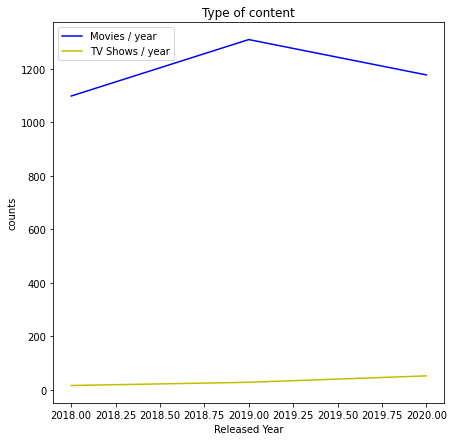

In [176]:
# Set up the matplotlib figure
plt.subplots(figsize=(7,7), sharex=False) 
plt.xlabel("Released Year")
plt.ylabel("counts")
plt.title("Type of content")      
#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", label="Movies / year")
sns.lineplot(data=tv_shows,color="y",  label="TV Shows / year")

## **Hypothesis from the data visualized**

**1. From above visualization we can say that Netflix has not added that number of TV shows/Movies than already released in last decade..**

**2. Dramas,international movies shows high numbers than rest of the genre.**

# **4. Clustering similar content by matching text-based features**

**We do some feature enginearing**

In [177]:
netflix['listed_in'].value_counts()
netflix['listed_in'].value_counts().size
#Too much classes, we just obtain the first 50 (the most common 50)
content_type=netflix['listed_in'].value_counts().iloc[0:50]

#Unify some of the similiar types by the "strongest wins" criterium:
#We dont need to diferenciate between international series, or TV/Movies dramas, we have other columns to do so

netflix=netflix.replace({'listed_in': 'Dramas, Independent Movies, International Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'Dramas, International Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'Dramas, Independent Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'TV Dramas'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'International TV Shows, TV Dramas'}, {'listed_in': 'Dramas'},regex=True)

#For documentaries
netflix=netflix.replace({'listed_in':'Documentaries, International Movies'}, {'listed_in': 'Documentaries'},regex=True) 

#For horror movies
netflix=netflix.replace({'listed_in':'Horror Movies, International Movies,'}, {'listed_in': 'Horror Movies'},regex=True)
netflix=netflix.replace({'listed_in':'Horror Movies, Thrillers'}, {'listed_in': 'Horror Movies'},regex=True)

#Thrillers
netflix=netflix.replace({'listed_in':'Dramas, Thrillers'}, {'listed_in': 'Thrillers'},regex=True)
netflix=netflix.replace({'listed_in':'International Movies, Thrillers'}, {'listed_in': 'Thrillers'},regex=True)

#Action
netflix=netflix.replace({'listed_in':'Action & Adventure, International Movies '}, {'listed_in': 'Action & Adventure'},regex=True)
netflix=netflix.replace({'listed_in':'Action & Adventure, Dramas'}, {'listed_in': 'Action & Adventure'},regex=True)

#Comedies in 3 groups: comedies, drama/comedies and romantic/comedies
netflix=netflix.replace({'listed_in':'Stand-Up Comedy'}, {'listed_in': 'Comedies'},regex=True)
netflix=netflix.replace({'listed_in':'Action & Adventure, Comedies, International Movies'}, {'listed_in': 'Comedies'},regex=True)
netflix=netflix.replace({'listed_in':'TV Comedies'}, {'listed_in': 'Comedies'},regex=True)
netflix=netflix.replace({'listed_in':'Comedies, International Movies'}, {'listed_in': 'Comedies'},regex=True)
netflix=netflix.replace({'listed_in':'Comedies, Dramas, Independent Movies'}, {'listed_in': 'Comedies, Dramas'},regex=True)
netflix=netflix.replace({'listed_in':'Comedies, International Movies, Romantic Movies'}, {'listed_in': 'Comedies, Romantic Movies'},regex=True)

#Kids TV all in one
netflix=netflix.replace({'listed_in': "Kids' TV, TV Comedies"}, {'listed_in': "Kids' TV"},regex=True)
netflix=netflix.replace({'listed_in': "Kids' TV, Comedies"}, {'listed_in': "Kids' TV"},regex=True)
netflix=netflix.replace({'listed_in': "Children & Family Movies, Comedies"}, {'listed_in': "Children & Family Movies"},regex=True)


#We have to delete the instances with listed_in: Movies. They dont give information and wont be useful in future
netflix=netflix[netflix['listed_in'] != 'Movies']

content_type=netflix['listed_in'].value_counts().iloc[0:50]

In [178]:
#We delete some features, we prepare the df to feed the clustering algorithms.

netflix=netflix.dropna(axis=0)
netflix.drop(netflix.iloc[:,[0,2,4,6,8,9,11,12,14,15]],axis=1,inplace=True)

#Form a full numerical valued dataset:
# Type
netflix['type']=netflix['type'].astype('category')
d1 = dict(enumerate(netflix['type'].cat.categories)) #To save old values
netflix['type']=netflix['type'].cat.codes

#Director
netflix['director']=netflix['director'].astype('category')
d2 = dict(enumerate(netflix['director'].cat.categories)) #To save old values
netflix['director']=netflix['director'].cat.codes

#Country
netflix['country']=netflix['country'].astype('category')
d3 = dict(enumerate(netflix['country'].cat.categories)) #To save old values
netflix['country']=netflix['country'].cat.codes

# Listed_in
netflix['listed_in']=netflix['listed_in'].astype('category')
d4= dict(enumerate(netflix['listed_in'].cat.categories)) #To save old values
netflix['listed_in']=netflix['listed_in'].cat.codes

netflix.head()

,type,director,country,release_year,listed_in,Year
1,0,1629,239,2016,184,2016
2,0,1136,295,2011,213,2018
3,0,3059,439,2009,39,2017
4,0,2812,439,2008,184,2020
5,1,3035,356,2016,234,2017


## **Corelation Heatmap**

In [179]:
netflix.corr()

,type,director,country,release_year,listed_in,Year
type,1.000000,-0.002961,-0.002018,0.076037,0.075448,0.016523
director,-0.002961,1.000000,-0.032688,-0.053474,-0.062498,0.027603
country,-0.002018,-0.032688,1.000000,-0.041902,-0.040678,0.000068
release_year,0.076037,-0.053474,-0.041902,1.000000,0.171949,0.018389
listed_in,0.075448,-0.062498,-0.040678,0.171949,1.000000,-0.016250
Year,0.016523,0.027603,0.000068,0.018389,-0.016250,1.000000


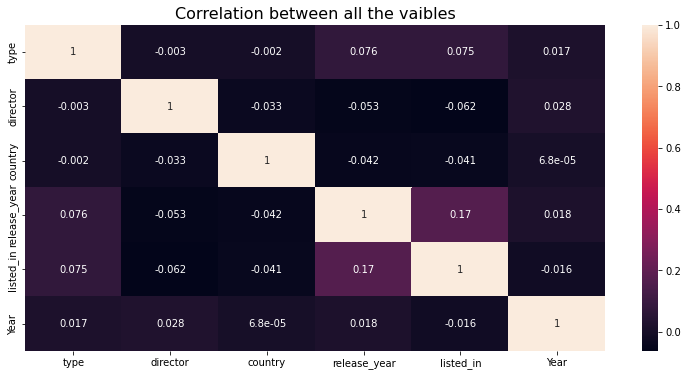

In [180]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(netflix.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Importing required libraries for clustering**

In [181]:
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

## **Clusters Model Implementation**

**1. Affinity Propagation**

**2. Agglomerative Clustering** 

**3. K-means Clustering**

## **1. Affinity Propagation**

In [182]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(preference=-753,damping=0.60,verbose=True,random_state=0).fit(netflix_standarized) #Using euclidean distance as affinity estimator
#af = AffinityPropagation(damping=0.97,affinity='euclidean',verbose=True).fit(netflix) #Using euclidean distance
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(netflix_standarized, labels, metric='sqeuclidean'))

Converged after 122 iterations.
Estimated number of clusters: 9


Text(0, 0.5, 'PCA component 2')

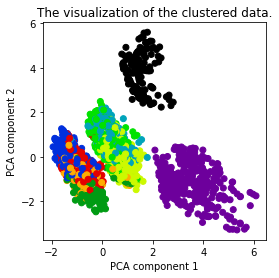

In [183]:
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
ax=plt.gca()
plt.scatter(netflix_pca[0], netflix_pca[1], c=colors)
ax.set_title("The visualization of the clustered data.")
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")

In [184]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(netflix_standarized, labels, metric='sqeuclidean'))

Silhouette Coefficient: 0.340


**Silhouette Coefficient score is 0.308 which is not that well. so we will try some diffrent clustering models.**

## **2. Agglomerative Clustering**

In [185]:
# transform the data using StandardScaler
netflix_standarized = pd.DataFrame(StandardScaler().fit_transform(netflix), columns = netflix.columns)

#Perform a PCA to visualize clusters
pca=PCA(n_components=2)
netflix_pca=pd.DataFrame(pca.fit_transform(netflix_standarized))

In [186]:
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Clusters")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("PCA component 1")
        ax2.set_ylabel("PCA component 2")

        plt.suptitle(("\nSilhouette analysis for Agglomerative clustering "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()       

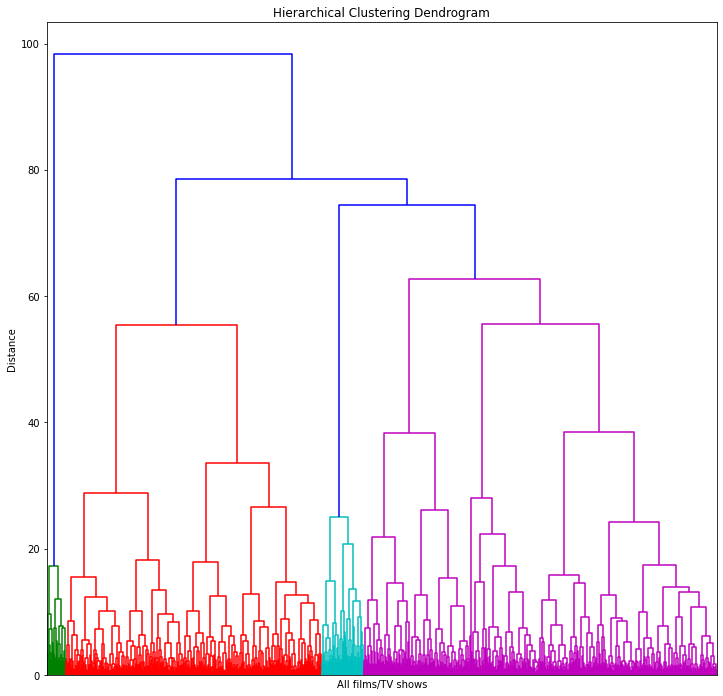

In [187]:
distances_linkage = linkage(netflix_standarized,
                            method = 'ward', 
                            metric = 'euclidean')

#The distance function can be:
#   ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, 
#   ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’
#   ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.                       
plt.figure(figsize=(12, 12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')
dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

### **Assume we cut vertical lines with a horizontal line to obtain the number of clusters.**

### **Number of clusters = 2**

For n_clusters = 2 The average silhouette_score is : 0.565906622281366


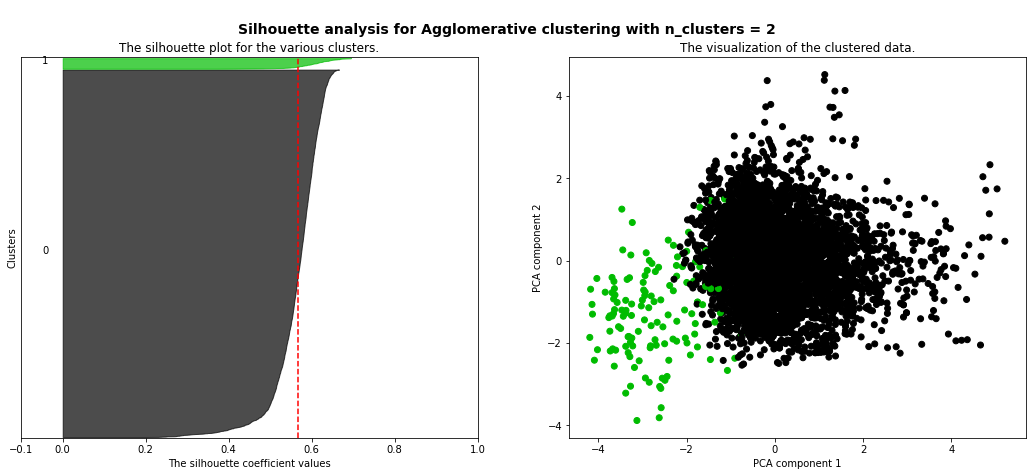

In [196]:
silhouette_analysis(np.array(netflix_standarized),netflix_pca,[2])

### **The average silhouette_score is : 0.565906622281366 which is good but not nearly 1.**

### **lets try diffrent clustering model**

## **3. k-means clustering**

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


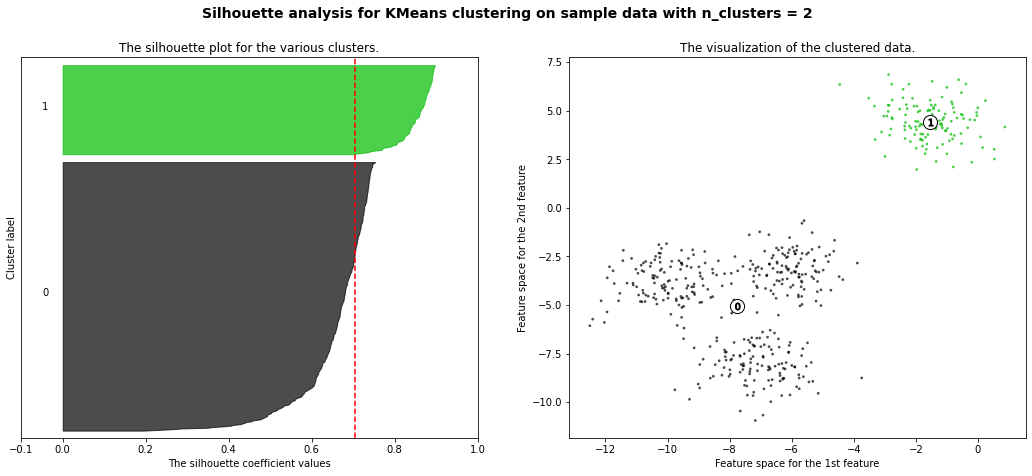

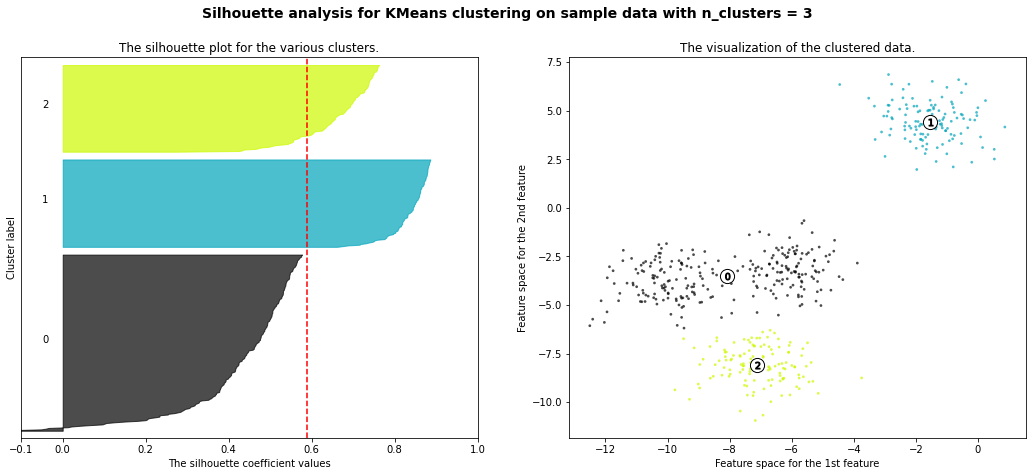

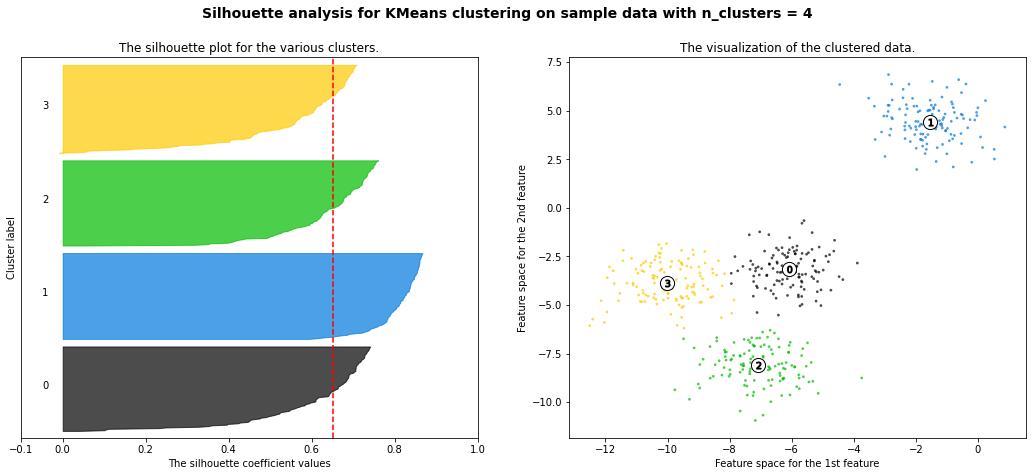

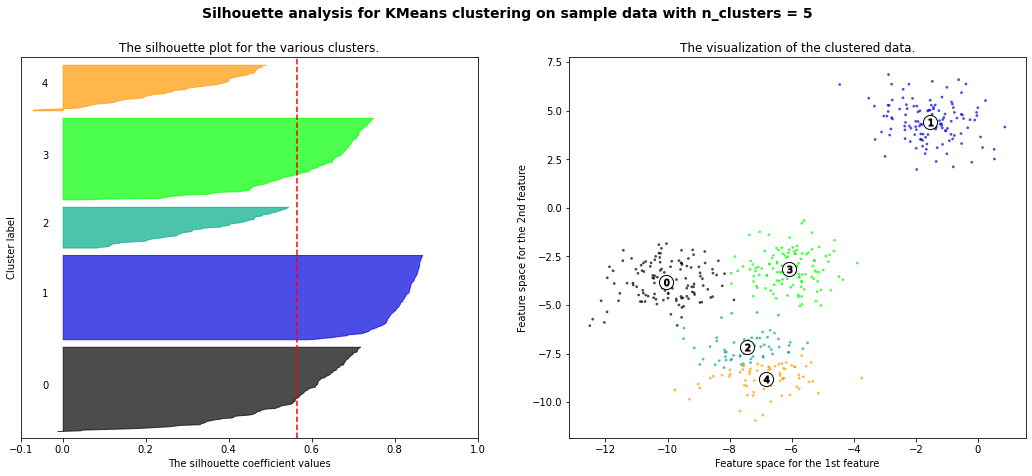

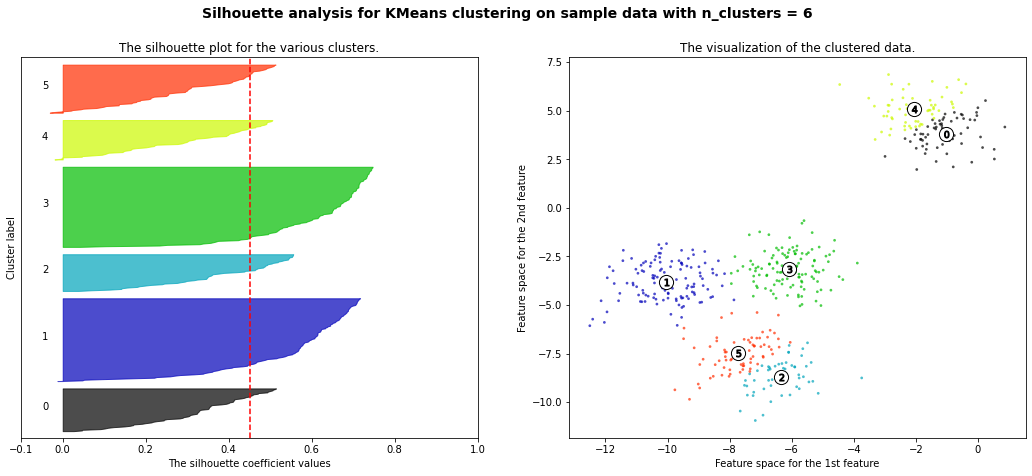

In [115]:
# Generating the sample data from make_blobs

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

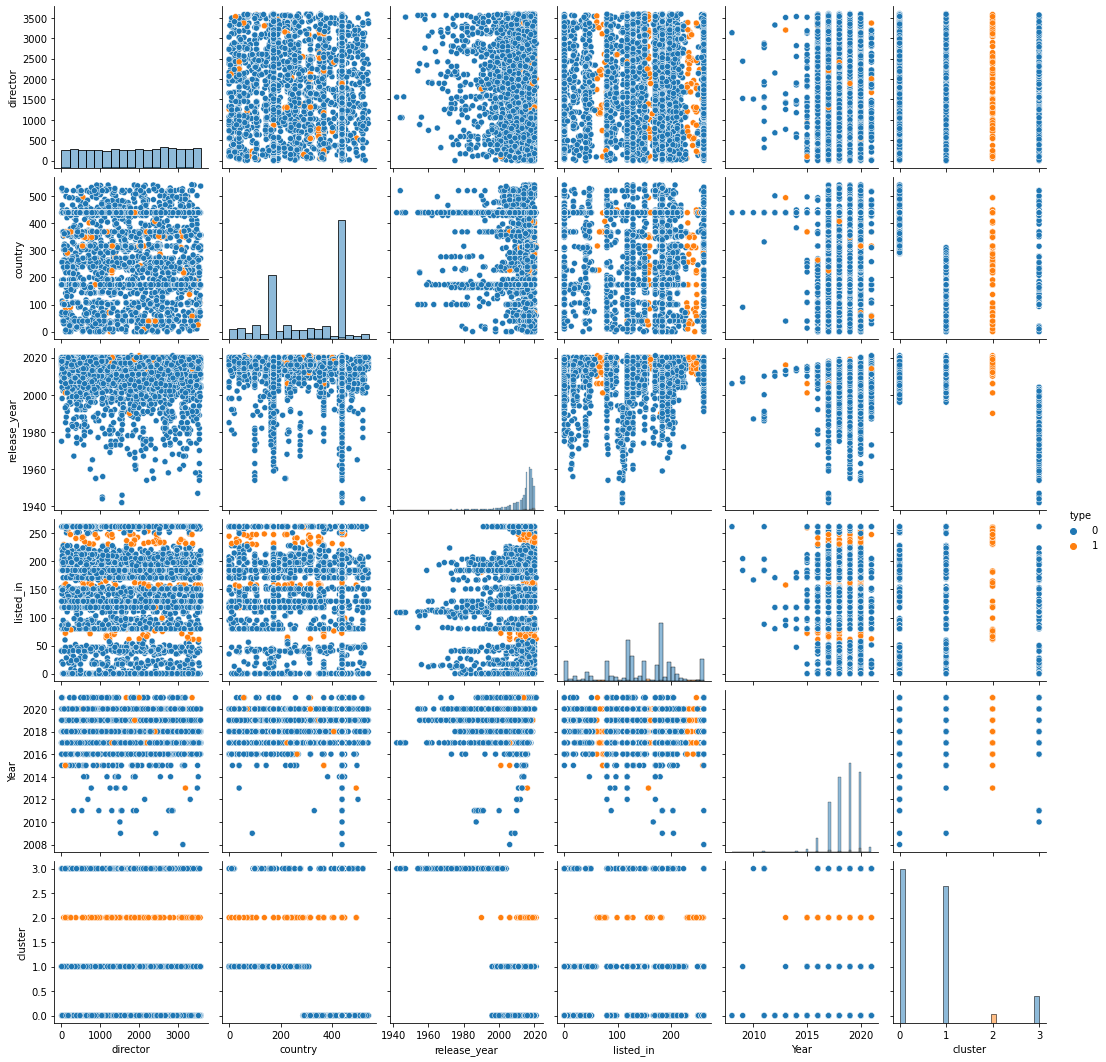

In [116]:
# MODEL INTERPRETATION
# We try to gain new knowledge using the previous clustering
sns_plot=sns.pairplot(netflix, hue="type", diag_kind="hist") #All features against each other
kmeans = KMeans(n_clusters = 4,random_state=42)
kmeans.fit(netflix_standarized)
netflix['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'NETFLIX ADDED')

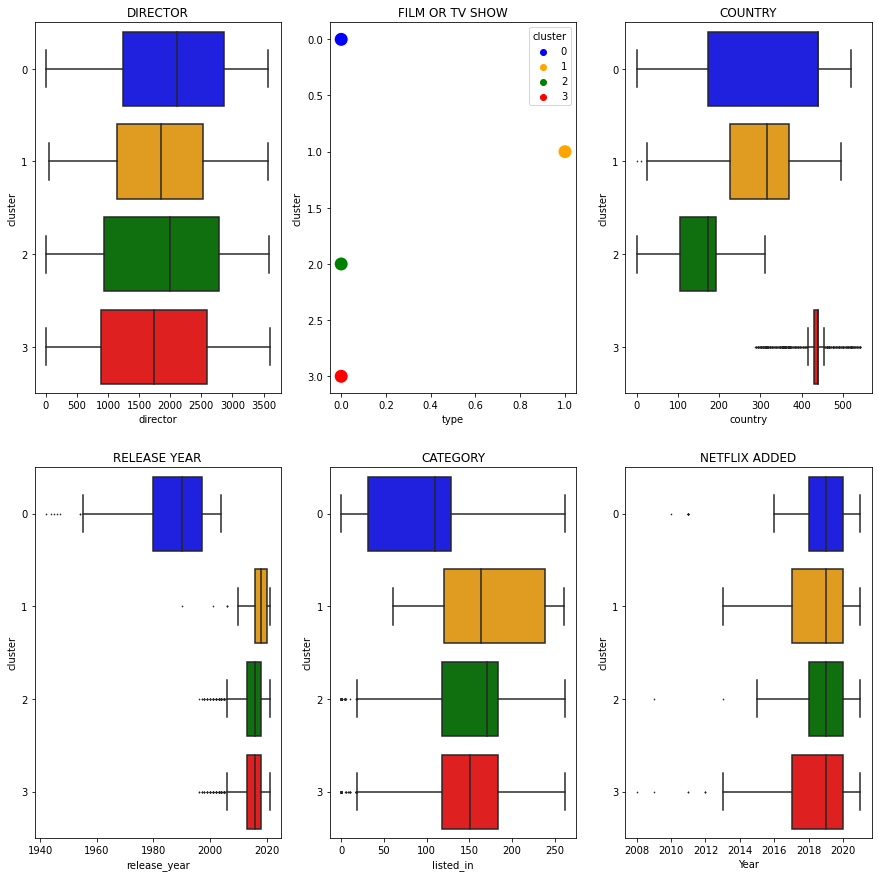

In [118]:
#We also plot some boxplots for our clusters

fig, ((ax10,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(2, 3)
fig.set_size_inches(15, 15)

plt.subplot(2, 3, 1)
ax1=sns.boxplot(x='director',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax1.set_title('DIRECTOR')

plt.subplot(2, 3, 2)
ax2=sns.scatterplot(x='type',
            y='cluster',
            hue='cluster',
            data=netflix,
            s=200,
            palette=['b','orange','g','r']
           )
ax2.invert_yaxis()
ax2.set_title('FILM OR TV SHOW')

plt.subplot(2, 3, 3)
ax3=sns.boxplot(x='country',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax3.set_title('COUNTRY')

plt.subplot(2, 3, 4)
ax4=sns.boxplot(x='release_year',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('RELEASE YEAR')

plt.subplot(2, 3, 5)
ax4=sns.boxplot(x='listed_in',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('CATEGORY')

plt.subplot(2, 3, 6)
ax4=sns.boxplot(x='Year',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('NETFLIX ADDED')

In [198]:
#We check for their codificated values to interpret the results:
#For 'type'       (Identifier-A Movie or TV Show)                   -To check type d1 and press shift+enter
#For 'director'   (Director of  Movie or TV Show)                   -To check type d2 and press shift+enter
#For 'Country'    (Country where the movie / show was produced)     -To check type d3 and press shift+enter
#For 'listed_in'  (category/Genere)                                 -To check type d4 and press shift+enter

**Observations :**